#### CSCE 670 :: Information Storage & Retrieval :: Texas A&M University :: Spring 2023


# Homework 1:  Lyrical Search Engine

### 100 points [9% of your final grade]

### Due: February 10 (Friday) by 11:59pm

*Goals of this homework:* In this homework you will get first hand experience building a text-based mini search engine. In particular, there are three main learning objectives: (i) the basics of tokenization (e.g. stemming, case-folding, etc.) and its effect on information retrieval; (ii) basics of index building and Boolean retrieval; and (iii) basics of the Vector Space model and ranked retrieval.

*Submission instructions (eCampus):* To submit your homework, rename this notebook as `UIN_hw1.ipynb`. For example, my homework submission would be something like `555001234_hw1.ipynb`. Submit this notebook via eCampus (look for the homework 1 assignment there). Your notebook should be completely self-contained, with the results visible in the notebook. We should not have to run any code from the command line, nor should we have to run your code within the notebook (though we reserve the right to do so). So please run all the cells for us, and then submit.

*Late submission policy:* For this homework, you may use as many late days as you like (up to the 5 total allotted to you).

*Collaboration policy:* You are expected to complete each homework independently. Your solution should be written by you without the direct aid or help of anyone else. However, we believe that collaboration and team work are important for facilitating learning, so we encourage you to discuss problems and general problem approaches (but not actual solutions) with your classmates. You may post on Piazza, search StackOverflow, etc. But if you do get help in this way, you must inform us by **filling out the Collaboration Declarations at the bottom of this notebook**. 

*Example: I found helpful code on stackoverflow at https://stackoverflow.com/questions/11764539/writing-fizzbuzz that helped me solve Problem 2.*

The basic rule is that no student should explicitly share a solution with another student (and thereby circumvent the basic learning process), but it is okay to share general approaches, directions, and so on. If you feel like you have an issue that needs clarification, feel free to contact either me or the TA.

# Dataset: Genius Lyrics Dataset

We are providing you with a small collection of the lyrics to 200 songs collected from Genius (https://genius.com/). The full data was originally collected by Austin Benson at Cornell (https://www.cs.cornell.edu/~arb/data/genius-expertise/). For this homework, you can use just the small set we provide: **lyrics_200.jl**. You should treat each song as a unique document to be indexed by your system. You can download the data from eCampus to your local filesystem. We're going to use these lyrics as the basis of a Lyrical Search Engine!

# Part 1: Read and Parse the Lyrics Data (20 points)

Recall how we handled file input in Homework 0? Well, here, our goal is to read the lyrics so that we can begin to tokenize them later. For this step, you should read the dataset and print the lyrics. Note that our dataset is in JSON lines format, meaning that each line break separates an entry in JSON format. A document looks like:

{'songs': 'Linkin-park-in-the-end-lyrics', 'lyrics': '\n\n[Verse 1: Mike Shinoda & Chester Bennington]\nIt starts...'}

For this homework, you should treat the lyrics as a document and the songs as the document ID.

Your output should look like this:

DocumentID Document

Linkin-park-in-the-end-lyrics \n\n[Verse 1: Mike Shinoda & Chester Bennington]\nIt starts...

... ...

In [108]:
# your code here
from typing import List, Dict, Set, Tuple
import json

DocumentList = []

with open('lyrics_200.jl', 'r') as f:
  for line in f.readlines():
    data = json.loads(line)
    DocumentList.append((data["song"], data["lyrics"]))
    
# DocuemntList = [(documentID, document)]
for doc in DocumentList:
  print(doc)

('Erykah-badu-kiss-me-on-my-neck-lyrics', "\n\n[Production by J Dilla, Erykah Badu, and James Poyser]\n\n[Refrain]\nI want somebody to walk up behind me\nAnd kiss me on my neck and breathe on my neck\nI want somebody to walk up behind me\nAnd kiss me on my neck and breathe on my neck\nBeen such a long time\nI forgot that I was fine\nJust kiss me on my neck and breathe on my neck\nI want somebody to walk up behind me\nAnd kiss me on my neck and breathe on my neck\n\n[Hook]\nIf you want to feel me\nBetter be divine\nBring me water, water for my mind\nGive me nothin'\nBreathe love in my air\nDon't abuse me\nCause these herbs are rare\n\nIf you want to feel me\nBetter be divine\nBring me water, water for my mind\nGive me nothin'\nBreathe love in my air\nDon't abuse me\nCause these herbs are rare\n\n[Verse]\nIf you want to feel me baby\nBetter be divine\nBring me water for these flowers\nGrowing out my mind\n\nGive me nothin' just be gentle\nBreathe love in my air\nUse me, don't abuse me, l

Now that you can read the documents, let's move on to tokenization. You should lowercase all words. Your parser needs to also provide the following three pre-processing options:
1. Remove background vocals (strings in parentheses) and song structure indicators 
(strings in square brackets, e.g., [Verse 1: Mike Shinoda & Chester Bennington])
2. Lemmatization: use nltk Lemmatizer `from nltk.stem import WordNetLemmatizer`
3. Remove any other strings that you think are less informative or noisy, e.g., non-word vocal sounds, non-character.

Please note that you should stick to the stemming package listed above. Otherwise, given the same query, the results generated by your code can be different from others. For tokenization, you could use [nltk.tokenize.word_tokenize](https://www.nltk.org/api/nltk.tokenize.html#module-nltk.tokenize) or you can write your own.

## Observations (3 * 4 = 12 points)

Once you have your parser working, you should 

* print the first two documents (documentID and tokens);

* report the size of your dictionary, that is, how many unique tokens;

* print a list of the top-10 most popular words by count;

under the four cases:

* None of pre-processing options (that is, just whatever nltk.tokenize.word_tokenize gives you)
* (1) Remove background vocals
* (1) + (2) Remove background vocals + Lemmatization
* (1) + (2) + (3) Remove background vocals  + Lemmatization + Remove other

Your output should look like this:

* DocumentID Tokens

* Unique token numbers:

* Rank Token Count

   1    awesome    20


In [109]:
# Your parser function here. It will take the three option variables above as the parameters.
# add cells as needed to organize your code

import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import re

nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [110]:
def tokenlization(lyrics: str, removing_background: bool, 
                  using_lemmatization: bool, removing_noise: bool) -> List[str]:
  lyrics = lyrics.lower()
  if removing_background:
    lyrics = bakckgound_removement(lyrics)
  if removing_noise:
    lyrics = noise_removement(lyrics)
  token = word_tokenize(lyrics)
  if using_lemmatization:
    lemmatization(token)
  return token

def bakckgound_removement(lyrics: str) -> str:
  return re.sub("\(.*?\)|\[.*?\]", "", lyrics)

def lemmatization(token: List[str]):
  wn = WordNetLemmatizer()
  for i, word in enumerate(token):
    token[i] = wn.lemmatize(word)

def noise_removement(lyrics: str) -> str:
  s = re.sub(r"[\W]", " ", lyrics)
  stop_words = set(stopwords.words('english'))
  return " ".join([w for w in s.split(" ") if w not in stop_words])

### None of Pre-processing Options

In [111]:
# your code and output here
TokenList = []
word_frequency1 = {}

for id, doc in DocumentList:
  token = tokenlization(doc, removing_background=False, using_lemmatization=False, removing_noise=False)
  TokenList.append(token)
  for w in token:
    if w in word_frequency1:
      word_frequency1[w] += 1
    else:
      word_frequency1[w] = 1
word_frequency1 = sorted(word_frequency1.items(), key=lambda x: x[1], reverse=True)

print("First Two Documents")
print(DocumentList[0][0], TokenList[0])
print(DocumentList[1][0], TokenList[1])
print("\nUnique Token Numbers:", len(word_frequency1))
print("\nRank Token Count")
for i in range(10):
  print(f"{i+1} {word_frequency1[i][0]} {word_frequency1[i][1]}")

First Two Documents
Erykah-badu-kiss-me-on-my-neck-lyrics ['[', 'production', 'by', 'j', 'dilla', ',', 'erykah', 'badu', ',', 'and', 'james', 'poyser', ']', '[', 'refrain', ']', 'i', 'want', 'somebody', 'to', 'walk', 'up', 'behind', 'me', 'and', 'kiss', 'me', 'on', 'my', 'neck', 'and', 'breathe', 'on', 'my', 'neck', 'i', 'want', 'somebody', 'to', 'walk', 'up', 'behind', 'me', 'and', 'kiss', 'me', 'on', 'my', 'neck', 'and', 'breathe', 'on', 'my', 'neck', 'been', 'such', 'a', 'long', 'time', 'i', 'forgot', 'that', 'i', 'was', 'fine', 'just', 'kiss', 'me', 'on', 'my', 'neck', 'and', 'breathe', 'on', 'my', 'neck', 'i', 'want', 'somebody', 'to', 'walk', 'up', 'behind', 'me', 'and', 'kiss', 'me', 'on', 'my', 'neck', 'and', 'breathe', 'on', 'my', 'neck', '[', 'hook', ']', 'if', 'you', 'want', 'to', 'feel', 'me', 'better', 'be', 'divine', 'bring', 'me', 'water', ',', 'water', 'for', 'my', 'mind', 'give', 'me', "nothin'", 'breathe', 'love', 'in', 'my', 'air', 'do', "n't", 'abuse', 'me', 'cause'

### (1) Remove background vocals

In [112]:
# your code and output here
TokenList = []
word_frequency2 = {}

for id, doc in DocumentList:
  token = tokenlization(doc, removing_background=True, using_lemmatization=False, removing_noise=False)
  TokenList.append(token)
  for w in token:
    if w in word_frequency2:
      word_frequency2[w] += 1
    else:
      word_frequency2[w] = 1
word_frequency2 = sorted(word_frequency2.items(), key=lambda x: x[1], reverse=True)


print("First Two Documents")
print(DocumentList[0][0], TokenList[0])
print(DocumentList[1][0], TokenList[1])
print("\nUnique Token Numbers:", len(word_frequency2))
print("\nRank Token Count")
for i in range(10):
  print(f"{i+1} {word_frequency2[i][0]} {word_frequency2[i][1]}")

First Two Documents
Erykah-badu-kiss-me-on-my-neck-lyrics ['i', 'want', 'somebody', 'to', 'walk', 'up', 'behind', 'me', 'and', 'kiss', 'me', 'on', 'my', 'neck', 'and', 'breathe', 'on', 'my', 'neck', 'i', 'want', 'somebody', 'to', 'walk', 'up', 'behind', 'me', 'and', 'kiss', 'me', 'on', 'my', 'neck', 'and', 'breathe', 'on', 'my', 'neck', 'been', 'such', 'a', 'long', 'time', 'i', 'forgot', 'that', 'i', 'was', 'fine', 'just', 'kiss', 'me', 'on', 'my', 'neck', 'and', 'breathe', 'on', 'my', 'neck', 'i', 'want', 'somebody', 'to', 'walk', 'up', 'behind', 'me', 'and', 'kiss', 'me', 'on', 'my', 'neck', 'and', 'breathe', 'on', 'my', 'neck', 'if', 'you', 'want', 'to', 'feel', 'me', 'better', 'be', 'divine', 'bring', 'me', 'water', ',', 'water', 'for', 'my', 'mind', 'give', 'me', "nothin'", 'breathe', 'love', 'in', 'my', 'air', 'do', "n't", 'abuse', 'me', 'cause', 'these', 'herbs', 'are', 'rare', 'if', 'you', 'want', 'to', 'feel', 'me', 'better', 'be', 'divine', 'bring', 'me', 'water', ',', 'water

### (1) + (2) Remove background vocals + Lemmatization

In [139]:
# your code and output here
TokenList = []
word_frequency3 = {}

for id, doc in DocumentList:
  token = tokenlization(doc, removing_background=True, using_lemmatization=True, removing_noise=False)
  TokenList.append(token)
  for w in token:
    if w in word_frequency3:
      word_frequency3[w] += 1
    else:
      word_frequency3[w] = 1
word_frequency3 = sorted(word_frequency3.items(), key=lambda x: x[1], reverse=True)

print("First Two Documents")
print(DocumentList[0][0], TokenList[0])
print(DocumentList[1][0], TokenList[1])
print("\nUnique Token Numbers:", len(word_frequency3))
print("\nRank Token Count")
for i in range(10):
  print(f"{i+1} {word_frequency3[i][0]} {word_frequency3[i][1]}")

First Two Documents
116-and-parris-chariz-big-wave-lyrics ['let', 'me', 'talk', 'big', 'plug', 'talk', 'on', 'the', 'line', ',', 'he', 'just', 'hold', 'me', 'down', 'big', 'dawg', 'p', 'take', 'it', 'home', ',', 'got', 'ta', 'give', 'it', 'to', 'the', 'pound', ',', 'yeah', 'light', 'up', ',', 'my', 'trick', 'in', 'my', 'bag', ',', 'try', 'take', 'me', 'out', ',', 'ayy', 'big', 'wave', 'drippin', "'", 'on', 'stage', ',', 'make', 'the', 'whole', 'crowd', 'drown', ',', 'uh', 'big', 'wave', 'drippin', "'", 'on', 'stage', 'big', 'dawg', 'let', 'me', 'out', 'the', 'cage', 'big', 'wave', 'drippin', "'", 'on', 'stage', ',', 'make', 'the', 'whole', 'crowd', 'drown', 'i', 'just', 'got', 'told', 'this', 'my', 'season', 'remember', 'when', 'i', 'wa', 'on', 'defense', 'god', 'took', 'me', 'out', 'of', 'the', 'deep', 'end', 'and', 'if', 'you', 'want', 'it', ',', 'it', "'s", 'better', 'to', 'speak', 'it', 'on', 'my', 'coffin', ',', 'get', 'back', 'to', 'treatment', 'i', "'m", 'a', 'soldier', ',', 'my

### (1) + (2) + (3) Remove background vocals  + Lemmatization + Remove other

In [114]:
# your code and output here
TokenList = []
word_frequency4 = {}

for id, doc in DocumentList:
  token = tokenlization(doc, removing_background=True, using_lemmatization=True, removing_noise=True)
  TokenList.append(token)
  for w in token:
    if w in word_frequency4:
      word_frequency4[w] += 1
    else:
      word_frequency4[w] = 1
word_frequency4 = sorted(word_frequency4.items(), key=lambda x: x[1], reverse=True)

print("First Two Documents")
print(DocumentList[0][0], TokenList[0])
print(DocumentList[1][0], TokenList[1])
print("\nUnique Token Numbers:", len(word_frequency4))
print("\nRank Token Count")
for i in range(10):
  print(f"{i+1} {word_frequency4[i][0]} {word_frequency4[i][1]}")

First Two Documents
Erykah-badu-kiss-me-on-my-neck-lyrics ['want', 'somebody', 'walk', 'behind', 'kiss', 'neck', 'breathe', 'neck', 'want', 'somebody', 'walk', 'behind', 'kiss', 'neck', 'breathe', 'neck', 'long', 'time', 'forgot', 'fine', 'kiss', 'neck', 'breathe', 'neck', 'want', 'somebody', 'walk', 'behind', 'kiss', 'neck', 'breathe', 'neck', 'want', 'feel', 'better', 'divine', 'bring', 'water', 'water', 'mind', 'give', 'nothin', 'breathe', 'love', 'air', 'abuse', 'cause', 'herb', 'rare', 'want', 'feel', 'better', 'divine', 'bring', 'water', 'water', 'mind', 'give', 'nothin', 'breathe', 'love', 'air', 'abuse', 'cause', 'herb', 'rare', 'want', 'feel', 'baby', 'better', 'divine', 'bring', 'water', 'flower', 'growing', 'mind', 'give', 'nothin', 'gentle', 'breathe', 'love', 'air', 'use', 'abuse', 'love', 'cause', 'herb', 'rare', 'want', 'feel', 'better', 'divine', 'bring', 'water', 'water', 'mind', 'give', 'nothin', 'breathe', 'love', 'air', 'abuse', 'cause', 'herb', 'rare', 'want', 'fee

## Zipf's Law (8 points)
Recall in class our discussion of Zipf's law. Let's see if this law applies to our Genius Lyrics. You should use matplotlib to plot the log-base10 term counts on the y-axis versus the log-base10 rank on the x-axis. Your aim is to create a figure like the one in Figure 5.2 of the textbook.

In [115]:
# your code here
import matplotlib.pyplot as plt
import math

def zipf_law(word_frequency: List[Tuple[str, int]], title: str):
  y = [math.log10(f[1]) for f in word_frequency]
  x = [math.log10(i) for i in range(1, len(word_frequency)+1)]
  plt.title(title)
  plt.xlabel("log10 rank")
  plt.ylabel("log10 term counts")
  plt.plot(x, y)

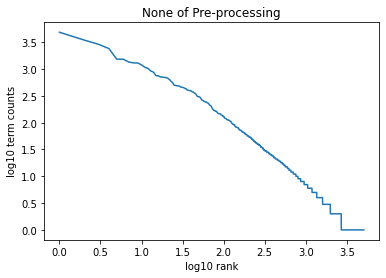

In [116]:
zipf_law(word_frequency1, "None of Pre-processing")

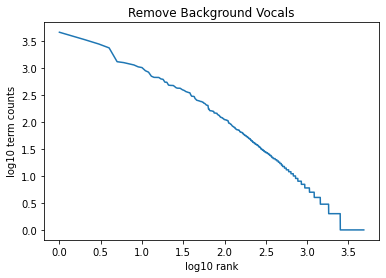

In [117]:
zipf_law(word_frequency2, "Remove Background Vocals")

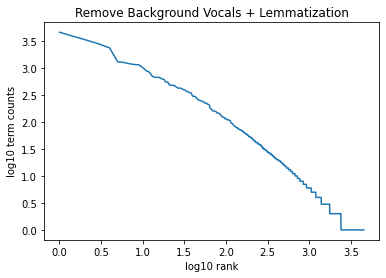

In [118]:
zipf_law(word_frequency3, "Remove Background Vocals + Lemmatization")

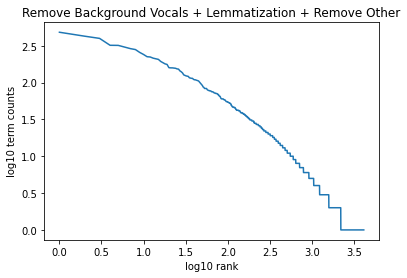

In [119]:
zipf_law(word_frequency4, "Remove Background Vocals + Lemmatization + Remove Other")

What do you observe? Explain.

*Add your discussion here.*

These four figures show similar result in the textbook. The result means that only a few words occur very often, and most of the words appear with low frequency. 


# Part 2: Boolean Retrieval (30 points)

In this part you will build an inverted index to support Boolean retrieval. You should use the (1) + (2) tokenization strategy from above (Remove background vocals + Lemmatization). 

We only require your index to support AND queries. In other words, your index does not have to support OR, NOT, or parentheses. Also, we do not explicitly expect to see AND in queries, e.g., when we query **relational model**, your search engine should treat it as **relational** AND **model**.

Search for the queries below using your index and print out matching documents (for each query, print out 5 matching documents):
* time
* never know
* make no sense

Recall, that you should apply the exact same pre-processing strategies to the query as we do to the documents. 

The output should like this:
* DocumentID Document

To make our life easier, please output the DocumentIDs in alphabetical order.

In [120]:
# build the index here
# add cells as needed to organize your code
class BooleanRetrieval:
  def __init__(self, document_list: List[Tuple[str, str]]):
    self._document_list = document_list
    self._token_list = self._build_token_list() 
    self._inverted_index = self._build_inverted_index()
  
  def _tokenlization(self, s: str) -> List[str]:
    return tokenlization(s, removing_background=True, using_lemmatization=True, removing_noise=False)

  def _build_token_list(self) -> List[List[str]]:
    token_list = []
    for id, doc in self._document_list:
      token_list.append(self._tokenlization(doc))
    return token_list

  def _build_inverted_index(self) -> Dict[str, Set[int]]:
    inverted_index = {}
    for i, token in enumerate(self._token_list):
      for w in token:
        if w in inverted_index:
          inverted_index[w].add(i)
        else:
          inverted_index[w] = {i}
    return inverted_index

  def search(self, query: str):
    result = self._search(query)
    if result:
      for i in result[:5]:
        print(self._document_list[i])
    else:
      print("Sorry, there is no song matching the query.")

  def _search(self, query: str) -> List[int]:
    result = []
    query_list = self._tokenlization(query)
    for q in query_list:
      if q in self._inverted_index:
        result.append(self._inverted_index[q])
      else:
        return []
    return sorted(list(set.intersection(*result)))
  
DocumentList = sorted(DocumentList, key= lambda x : x[0])
br = BooleanRetrieval(DocumentList)

Now show the results for the query: `time`

In [121]:
# search for the input using your index and print out ids of matching documents.
query = "time"
br.search(query)

('5-seconds-of-summer-close-as-strangers-lyrics', "\n\n[Verse 1: Michael]\nSix weeks since I've been away\nAnd now you're saying everything has changed\nAnd I'm afraid that I might be losing you\nAnd every night that we spend alone\nIt kills me thinking of you on your own\nAnd I wish I was back home next to you\n\n[Pre-Chorus: Michael]\nOh, everyday you feel a little bit further away\nAnd I don't know what to say\n\n[Chorus: All]\nAre we wasting time\nTalking on a broken line?\nTelling you I haven't seen your face in ages\nI feel like we're as close as strangers\nWon't give up\nEven though it hurts so much\nEvery night I'm losing you in a thousand faces\nNow it feels we're as close as strangers\n\n[Verse 2: Calum]\nLate night calls and another text\nIs this as good as we're gonna get?\nAnother time zone taking me away from you\nLiving dreams and fluorescent lights\nWhile you and I are running out of time\nBut you know that I'll always wait for you\n\n[Pre-Chorus: Calum]\nOh, everyday y

Now show the results for the query: `never know`


In [122]:
# your code here
query = "never know"
br.search(query)

('2pac-u-r-ripping-us-apart-dedicated-2-crack-annotated', "\n\nBefore u came the triangle never broke\nwe were bonded and melded as one\nBut as the 2 pushed u away\nThe one got weak and embraced u\nand now u R ripping us Apart\n\nThe worst feeling of helplessness\nThe greatest pain has rested in my heart\nThe vision of heaven fades\nand the nightmare of loneliness has started\n\nMy Hero has been defeated by you\nand now what can I do\nwatch as u Destroy us\nand our love is finally Through\n\nI know the worst is Here\nI feel it in my Heart\nu got into the circle\nnow you're tearing us apart !!!!!!!!!!!!!!\n\n")
('5-seconds-of-summer-heartbreak-girl-lyrics', '\n\n[Verse 1: Calum]\nYou call me up, it\'s like a broken record\nSaying that your heart hurts\nThat you\'d never get over him getting over you\nAnd you end up crying\nAnd I end up lying\n\'Cause I\'m just a sucker for anything that you do\n\n[Pre-Chorus: Luke]\nAnd when then phone call finally ends\nYou say "thanks for being a frie

Now show the results for the query: `make no sense`

In [123]:
# your code here
query = "make no sense"
br.search(query)

('Bring-me-the-horizon-mother-tongue-lyrics', '\n\n[Verse 1]\nI didn\'t see it coming (Coming)\nBut I never really had much faith\nIn the universe\'s magic (Magic), oh, no\nTill it pulled us to that time and place\nAnd I\'ll never forget\nWhen the floodgates opened, we, we cried an ocean\nIt still has me choking; it\'s hard to explain\nI know you know me, you don\'t have to show me\nI, I feel you\'re lonely, no need to explain\n\n[Chorus]\nSo don\'t say you love me; fala, "amo"\nJust let your heart speak up, and I\'ll know\nNo amount of words could ever find a way to make sense of this\nSo I wanna hear your mother tongue\nSo don\'t say you love me; fala, "amo"\nJust let your heart speak up, and I\'ll know\nNo amount of words could ever find a way to make sense of this\nSo I wanna hear your mother tongue\n\n[Verse 2]\nAnd yeah, I could be punching\nBut I always tend to fluctuate\nAnd I feel sick that I\'m buzzing, oh, love, I\'m in trouble\nI\'m sorry, but you got me gushing all over th

## Observations (6 points)
Could your boolean search engine find relevant documents for these queries? What is the impact of the pre-processing options? Do they improve your search quality?

*your discussion here*

The boolean search engine could only find the documents which contain all the words in queries. They might not be relevant enough to the query.

Pre-processing is important for information retrieval. First, pre-processing would remove some words that are useless, such as the background vocal and the stop words. It helps to decrease the size of the inverted index and increase the searching efficiency. Secondly, lemmatization could increase the flexibility of our search engine. Users could find results with queries that contain different word forms. However, pre-precessing still has some disadvantages. For example, removing stop words is not suitable for phrase query. The query is "meet me at midnight", but "at" is removed. The search engine could not find the right documents for users.



# Part 3: Ranking Documents (40 points) 

In this part, your job is to rank the documents rather than just provide set-based results as in Boolean Retrieval.

### A: Ranking with simple sums of TF-IDF scores (10 points) 
For a multi-word query, we rank documents by a simple sum of the TF-IDF scores for the query terms in the document.
TF is the log-weighted term frequency $1+log(tf)$; and IDF is the log-weighted inverse document frequency $log(\frac{N}{df})$

**Output:**
You should output the top-5 results plus the TF-IDF sum score of each of these documents. 

The output should be like this:

Rank Scores DocumentID Document 

In [124]:
class TFIDFRanking(BooleanRetrieval):
  def __init__(self, document_list: List[Tuple[str, str]]):
    super().__init__(document_list)
    self._no_document = len(document_list)

  def _TF(self, token: List[str], q: str) -> float:
    return 1 + math.log10(token.count(q)) if q in token else 0

  def _IDF(self, q: str) -> float:
    return math.log10(self._no_document/len(self._inverted_index[q]))

  def _TFIDF(self, result: List[int], query: str) -> List[Tuple[int, float]]:
    score = []
    query_list = self._tokenlization(query)
    for i in result:
      tfidf = sum([self._TF(self._token_list[i], q) * self._IDF(q) for q in query_list])
      score.append((i, tfidf))
    return sorted(score, key= lambda x: x[1], reverse=True)

  def search(self, query: str):
    result = self._search(query)
    if result:
      tfidf_rank = self._TFIDF(result, query)
      for rank, (i, score) in enumerate(tfidf_rank[:5]):
        print(f"{rank+1} {score} {self._document_list[i]}")
    else:
      print("Sorry, there is no song matching the query.")

tfidf_ranking = TFIDFRanking(DocumentList)

Now show the results for the query: `time`

In [125]:
# your code here
# hint: you could first call boolean retrieval function in part 2 to find possible relevant documents, 
# and then rank these documents in this part. Hence, you don't need to rank all documents.
query = "time"
tfidf_ranking.search(query)

1 0.9977988197956733 ('Derek-minor-until-the-end-of-time-lyrics', "\n\n[Intro]\nTime is the fourth dimension\nAnd a measure in which events can ordered\nFrom the past, through the present, into the future\nAll signify that we are all bound to time\n\n[Hook: Derek Minor]\nI be on that work like I'm 'posed to be\nI be on this here until you bury me\nBuildin' His empire that never die\nI bet He'll be here till the end of time\nThat's forever, ever ever, ever ever\nEver, ever ever, till the end of time\nThat's forever, ever ever, ever ever\nEver, ever ever, till the end of time\nThat's forever, ever ever, ever ever\nEver, ever ever, till the end of time\nThat's forever, ever ever, ever ever\nEver, ever ever, till the end of time\n\n[Verse 1: Derek Minor]\nGrindin', workin', hustlin' on this mission, I will never quit\nEvery single track you put in front of me I'm killin' it\nNot for money, fame, attention, this is what I'm gettin at\nChrist the King and this His empire, He don't deserve no

Now show the results for the query: `never know`

In [126]:
# your code here
query = "never know"
tfidf_ranking.search(query)

1 1.295127863623112 ('Skrillex-pretty-bye-bye-lyrics', "\n\n[Verse]\nI know you are trouble\nBut I can't seem to get away\nAll the pleasure, all the pain\nPalm trees swaying in the rain\nAll those times we stayed in\nThe way the smoke would fill the room\nAnd we'd be dancing in the clouds\nLike we had nothing to lose\n\n[Chorus]\nI haven't heard from you, it's been a long time\nKnow that I hurt you, it stays on my mind\nLet me make it right\nWe never said goodbye\nWhat you been thinking 'bout?\nKnow that we're worth the fight\nSo let me make it right\nI might have had my doubts\nSaid some things I regret\nIf I could take it back\nI wouldn't hesitate\nWe never said goodbye\nNever said goodbye, baby\nWhat you been thinking 'bout\nYou've been thinking 'bout lately?\nKnow we're worth the fight\nKnow we're worth the fight\nSo let me make it right\nIt's been a long time\n\n[Instrumental break]\nSo let\nSo let\nSo let\nSo let\nSo let\nSo let\nSo let\nSo let me make it right\n\n[Verse]\nI know

Now show the results for the query: `make no sense`

In [127]:
# your code here
query = "make no sense"
tfidf_ranking.search(query)

1 4.482243935740574 ('Bring-me-the-horizon-mother-tongue-lyrics', '\n\n[Verse 1]\nI didn\'t see it coming (Coming)\nBut I never really had much faith\nIn the universe\'s magic (Magic), oh, no\nTill it pulled us to that time and place\nAnd I\'ll never forget\nWhen the floodgates opened, we, we cried an ocean\nIt still has me choking; it\'s hard to explain\nI know you know me, you don\'t have to show me\nI, I feel you\'re lonely, no need to explain\n\n[Chorus]\nSo don\'t say you love me; fala, "amo"\nJust let your heart speak up, and I\'ll know\nNo amount of words could ever find a way to make sense of this\nSo I wanna hear your mother tongue\nSo don\'t say you love me; fala, "amo"\nJust let your heart speak up, and I\'ll know\nNo amount of words could ever find a way to make sense of this\nSo I wanna hear your mother tongue\n\n[Verse 2]\nAnd yeah, I could be punching\nBut I always tend to fluctuate\nAnd I feel sick that I\'m buzzing, oh, love, I\'m in trouble\nI\'m sorry, but you got me

### B: Ranking with vector space model with TF-IDF (10 points) 

**Cosine:** You should use cosine as your scoring function. 

**TFIDF:** For the document vectors, use the standard TF-IDF scores as introduced in A. For the query vector, use simple weights (the raw term frequency). For example:
* query: never $\rightarrow$ (1)
* query: never know $\rightarrow$ (1, 1)

**Output:**
You should output the top-5 results plus the cosine score of each of these documents.  

The output should be like this:

Rank Scores DocumentID Document 

---

You can additionally assume that your queries will contain at most three words. Be sure to normalize your vectors as part of the cosine calculation!

In [128]:
class TFIDFVectorSpaceRanking(TFIDFRanking):
  def __init__(self, document_list: List[Tuple[str, str]]):
    super().__init__(document_list)

  def _cosine(self, token: List[str], query_list: List[str]) -> float:
    unique_token = set(token)
    dot_production = sum([self._TF(token, q) * self._IDF(q) for q in query_list])
    document_vector = [self._TF(token, t) * self._IDF(t) for t in unique_token]
    normalization = math.sqrt(len(query_list)) * math.sqrt(sum([w**2 for w in document_vector]))
    return dot_production / normalization

  def _vector_space(self, query: str) -> List[Tuple[int, float]]:
    score = []
    query_list = self._tokenlization(query)
    for i, token in enumerate(self._token_list):
      score.append((i, self._cosine(token, query_list)))
    return sorted(score, key= lambda x: x[1], reverse=True)

  def search(self, query: str):
    vector_space_rank = self._vector_space(query)
    for rank, (i, score) in enumerate(vector_space_rank[:5]):
      print(f"{rank+1} {score} {self._document_list[i]}")

tfidf_vector_space = TFIDFVectorSpaceRanking(DocumentList)

Now show the results for the query: `time`

In [129]:
# your code here
query = "time"
tfidf_vector_space.search(query)

1 0.10065154931521363 ('John-legend-for-the-first-time-lyrics', "\n\n[Produced by Dave Tozer & John Legend]\n\n[Verse 1]\nIs that music in my ear\nIt's like I heard nothing for a thousand years\nMy eyes were closed, locking in my tears\n\nI was so surrounded but still all alone\nA great big house but so far from home\nHow'd you breathe life in this heart of soul\n\n[Hook]\nIt's like I can feel, it's like I can breathe\nIt's like I can live, it's like I can love\nFor the first time, for the first time\nFor the first time, for the first time\n\n[Bridge]\nI'm electric, finally exposed\nYou see through me, strip off all my clothes\nIf this is falling, then let me go, oh\n\n[Hook]\nIt's like I can feel, it's like I can breathe\nIt's like I can live, it's like I can love\nFor the first time, for the first time\nFor the first time, for the first time\n\n[Verse 2]\nI'm finally awake and I can feel my heart\nIt's beating like a drum when I'm right here where you are\nI can feel it, I can feel i

Now show the results for the query: `never know`

In [130]:
# your code here
query = "never know"
tfidf_vector_space.search(query)

1 0.0733540485435662 ('John-legend-made-to-love-lyrics', "\n\n[Produced by Dave Tozer, Da Internz, Kanye West & Nana Kwabena]\n\n[Hook: John Legend]\nI was sent here for you\nWe were made to love\nWe were made to love\nYou were sent for me too\nWe were made to love\nWe were made to love\n\n[Verse 1: John Legend]\nOooh, I've never seen anything\nIt's much more than you and me\nExtraordinary machine\nOooh, I've never loved, I've never loved\nNever loved someone like this\nAll I know is...\n\n[Hook: John Legend]\nI was sent here for you\nWe were made to love\nWe were made to love\nYou were sent for me too\nWe were made to love\nWe were made to love\n\n[Interlude]\nAll made for love, we were made to love...\n\n[Hook: John Legend]\nI was sent here for you\nWe were made to love\nWe were made to love\nYou were sent for me too\nWe were made to love\nWe were made to love\n\n[Verse 2: John Legend]\nOooh, have you ever known\nWe laid your eyes on\nThe perfect work of art\nI knew right from the st

Now show the results for the query: `make no sense`

In [131]:
# your code here
query = "make no sense"
tfidf_vector_space.search(query)

1 0.16633893667317193 ('Bring-me-the-horizon-mother-tongue-lyrics', '\n\n[Verse 1]\nI didn\'t see it coming (Coming)\nBut I never really had much faith\nIn the universe\'s magic (Magic), oh, no\nTill it pulled us to that time and place\nAnd I\'ll never forget\nWhen the floodgates opened, we, we cried an ocean\nIt still has me choking; it\'s hard to explain\nI know you know me, you don\'t have to show me\nI, I feel you\'re lonely, no need to explain\n\n[Chorus]\nSo don\'t say you love me; fala, "amo"\nJust let your heart speak up, and I\'ll know\nNo amount of words could ever find a way to make sense of this\nSo I wanna hear your mother tongue\nSo don\'t say you love me; fala, "amo"\nJust let your heart speak up, and I\'ll know\nNo amount of words could ever find a way to make sense of this\nSo I wanna hear your mother tongue\n\n[Verse 2]\nAnd yeah, I could be punching\nBut I always tend to fluctuate\nAnd I feel sick that I\'m buzzing, oh, love, I\'m in trouble\nI\'m sorry, but you got 

### C: Ranking with BM25 (10 points) 
Finally, let's try the BM25 approach for ranking. Refer to https://en.wikipedia.org/wiki/Okapi_BM25 for the specific formula. You could choose k_1 = 1.2 and b = 0.75 but feel free to try other options.

**Output:**
You should output the top-5 results plus the BM25 score of each of these documents.  

The output should be like this:

Rank Scores DocumentID Document

In [132]:
class BM25Ranking(TFIDFRanking):
  def __init__(self, document_list: List[Tuple[str, str]]):
    super().__init__(document_list)
    self._k1 = 1.2
    self._b = 0.75
    self._avg_document_length = sum([len(t) for t in self._token_list]) / len(self._token_list)
    
  def _IDF(self, q: str) -> float:
    N = self._no_document
    n = len(self._inverted_index[q])
    return math.log((N - n + 0.5) / (n + 0.5) + 1)

  def _TF(self, token, q):
    return token.count(q)
  
  def _BM25(self, token: List[str], query_list: List[str]) -> float:
    bm25 = 0.0
    for q in query_list:
      length_normalization = 1 - self._b + self._b * len(token) / self._avg_document_length
      bm25 += self._IDF(q) * (self._TF(token, q) * (self._k1 + 1)) / (self._TF(token, q) + self._k1 * length_normalization)
    return bm25 

  def _BM25_rank(self, query: str) -> List[Tuple[int, float]]:
    score = []
    query_list = self._tokenlization(query)
    for i, token in enumerate(self._token_list):
      score.append((i, self._BM25(token, query_list)))
    return sorted(score, key= lambda x: x[1], reverse=True)
  
  def search(self, query: str):
    bm25_rank = self._BM25_rank(query)
    for rank, (i, score) in enumerate(bm25_rank[:5]):
      print(f"{rank+1} {score} {self._document_list[i]}")

bm25 = BM25Ranking(DocumentList)

Now show the results for the query: `time`

In [133]:
# your code here
query = "time"
bm25.search(query)

1 2.0242400860668766 ('John-legend-for-the-first-time-lyrics', "\n\n[Produced by Dave Tozer & John Legend]\n\n[Verse 1]\nIs that music in my ear\nIt's like I heard nothing for a thousand years\nMy eyes were closed, locking in my tears\n\nI was so surrounded but still all alone\nA great big house but so far from home\nHow'd you breathe life in this heart of soul\n\n[Hook]\nIt's like I can feel, it's like I can breathe\nIt's like I can live, it's like I can love\nFor the first time, for the first time\nFor the first time, for the first time\n\n[Bridge]\nI'm electric, finally exposed\nYou see through me, strip off all my clothes\nIf this is falling, then let me go, oh\n\n[Hook]\nIt's like I can feel, it's like I can breathe\nIt's like I can live, it's like I can love\nFor the first time, for the first time\nFor the first time, for the first time\n\n[Verse 2]\nI'm finally awake and I can feel my heart\nIt's beating like a drum when I'm right here where you are\nI can feel it, I can feel it

Now show the results for the query: `never know`

In [134]:
# your code here
query = "never know"
bm25.search(query)

1 2.9128585393611033 ('Skrillex-pretty-bye-bye-lyrics', "\n\n[Verse]\nI know you are trouble\nBut I can't seem to get away\nAll the pleasure, all the pain\nPalm trees swaying in the rain\nAll those times we stayed in\nThe way the smoke would fill the room\nAnd we'd be dancing in the clouds\nLike we had nothing to lose\n\n[Chorus]\nI haven't heard from you, it's been a long time\nKnow that I hurt you, it stays on my mind\nLet me make it right\nWe never said goodbye\nWhat you been thinking 'bout?\nKnow that we're worth the fight\nSo let me make it right\nI might have had my doubts\nSaid some things I regret\nIf I could take it back\nI wouldn't hesitate\nWe never said goodbye\nNever said goodbye, baby\nWhat you been thinking 'bout\nYou've been thinking 'bout lately?\nKnow we're worth the fight\nKnow we're worth the fight\nSo let me make it right\nIt's been a long time\n\n[Instrumental break]\nSo let\nSo let\nSo let\nSo let\nSo let\nSo let\nSo let\nSo let me make it right\n\n[Verse]\nI kno

Now show the results for the query: `make no sense`

In [135]:
# your code here
query = "make no sense"
bm25.search(query)

1 9.848751413034517 ('Bring-me-the-horizon-mother-tongue-lyrics', '\n\n[Verse 1]\nI didn\'t see it coming (Coming)\nBut I never really had much faith\nIn the universe\'s magic (Magic), oh, no\nTill it pulled us to that time and place\nAnd I\'ll never forget\nWhen the floodgates opened, we, we cried an ocean\nIt still has me choking; it\'s hard to explain\nI know you know me, you don\'t have to show me\nI, I feel you\'re lonely, no need to explain\n\n[Chorus]\nSo don\'t say you love me; fala, "amo"\nJust let your heart speak up, and I\'ll know\nNo amount of words could ever find a way to make sense of this\nSo I wanna hear your mother tongue\nSo don\'t say you love me; fala, "amo"\nJust let your heart speak up, and I\'ll know\nNo amount of words could ever find a way to make sense of this\nSo I wanna hear your mother tongue\n\n[Verse 2]\nAnd yeah, I could be punching\nBut I always tend to fluctuate\nAnd I feel sick that I\'m buzzing, oh, love, I\'m in trouble\nI\'m sorry, but you got me

### Discussion (10 points)
Briefly discuss the differences you see between the three methods. You should try additional queries beyond the ones we list. Is there a ranking approach you prefer? Explain and give concrete examples.


*your discussion here*

1. TF-IDF model only considers the number of times the query appears in the document and the importance of the words in the dataset. This method is easy to implement. However, it ignores the influence of the length of documents. Some documents get high TF-IDF scores only because they contain more words, not because they are more relevant to the query. For example, with the query "time", the song, Derek-minor-until-the-end-of-time-lyrics, whose score is the highest contains lots of words.

2. Vector space model ranks documents according to the angle between the query and documents. The normalization factor considers the weightage of other words in the document. However, this method would take more time because it should calculate TF-IDF for all words in a document.

3. BM25 uses two Poisson approximate and document length normalization. This method takes term frequency, the importance of words, and document length into account, and its takes less time than the vector space model.

These three methods could find documents that contain the query. When the query contains words that are rare in all documents, these three methods return similar results (query = "test"). On the other hand, if the query contains popular words, the results from then are quite different. For this lyrics search scenario, I prefer the TF-IDF model. This is because people easily remember the word occurs frequently in one song, and the difference in lyrics length is small. Therefore, TF-IDF could handle this problem. 

In [136]:
query = "test"
print("tfidf")
tfidf_ranking.search(query)
print("vector space")
tfidf_vector_space.search(query)
print("bm25")
bm25.search(query)

tfidf
1 2.439743109457356 ('Drake-one-dance-dub-lyrics', "\n\n[Intro: Kyla]\nBaby I like your style\n\n[Verse 1: Drake]\nGrips on your waist\nUnruly me say\nThis sound just done the place\nStreets not safe\nPapi never run away\nEven when he's away\nOti, oti, there's never much love when we go OT\nI pray to make it back in one piece\nI pray, I pray\n\n[Hook: Drake]\nThat's why I need a one dance\nPoppy got that Hennessy in his hand\nWhat sound can test? I don't know\nWatch the whole dance get turned over\nSaid I need a one dance\nPoppy got that Hennessy in his hand\nWhat sound can test? I don't know\nWatch the whole dance get turned over\n\n[Bridge: Kyla]\nMixpak sound\nBaby I like your style\nYa unruly mudas!\n\n[Verse 2: Drake]\nStrength and guidance\nNext soundbwoy is not my friend\nMetro not smoke, so his yiy change\nUnruly gang, worldwide ting\nDon't know why they still try me\nBun Vegas, he cyaan reply me\nI don't wanna spend time fighting\nUnruly time\n\n[Hook: Drake]\nThat's why

In [137]:
query = "when"
print("tfidf")
tfidf_ranking.search(query)
print("vector space")
tfidf_vector_space.search(query)
print("bm25")
bm25.search(query)

tfidf
1 0.8846702787335602 ('Charli-xcx-cross-you-out-lyrics', "\n\n[Verse 1: Charli XCX]\nBuilt a world all in my mind\nAll on my own, will I survive? Oh\n\n[Pre-Chorus: Charli XCX]\nCentury of tears\nSadness was my only smile, yeah\nSo I fall apart\nBut you're gone and I'm doing fine\nI'm screaming out\n\n[Chorus: Charli XCX]\nOoh, ooh\nWhen you're not around, when you're not around\nWhen you're not around, when you're not around, ooh\nWhen you're not around, when you're not around\nI'll finally cross you out\nOoh, ooh\nWhen you're not around, when you're not around\nWhen you're not around, when you're not around, ooh\nWhen you're not around, when you're not around\nI'll finally cross you out\n\n[Verse 2: Sky Ferreira]\nMelt me down one piece at a time\nI seal these eyes wide shut\nI wasn't mesmerized, no\n\n[Pre-Chorus: Sky Ferreira]\nCentury of tears\nSadness was another denial, yeah\nThought I'd fall apart\nBut now you're gone, I'm doing fine\nI'm screaming out\n\n[Chorus: Charli 

# Part 4: Cool Extension (10 points) 

Finally, we give you an opportunity to explore some more sophisticated approach to your search engine. This is your chance to show off something you find interesting. For example, you might:


*   Add a positional index so you can support phrase queries
*   Implement a permuterm index for wildcard queries
*   Incorporate spell correction
*   Index all of the lyrics at https://www.cs.cornell.edu/~arb/data/genius-expertise/ and demonstrate an efficient implementation
*   Try a more advanced ranking approach
*   ...

We will grade this last part according to effort, creativity, and impact.



I implemented a search engine that supports phrase query. Also, the search engine would rank documents through BM25. If the document contains the phrase query, the BM25 score would calculate based on it. The TF(D,phrase) is the number of times that the phrase occurs in document D, and the IDF(phrase) is changed to calculate the number of documents containing the phrase. On the other hand, if the other document dose not contain the phrase query, the origin BM25 would be used to rank it. Because the IDF value of a phrase is greater than the IDF value of a single word, the documents containing the phrase query would be at the top of the rank.

In [138]:
class BM25PhraseQuery(BM25Ranking):
  def __init__(self, document_list: List[Tuple[str, str]]):
    super().__init__(document_list)

  def _IDF_phrase(self, query_list: str) -> float:
    N = self._no_document
    n = 0
    for token in self._token_list:
      if (" ".join(query_list)) in (" ".join(token)):
        n += 1
    return math.log((N - n + 0.5) / (n + 0.5) + 1)

  def _TF_phrase(self, token, query_list):
    return " ".join(token).count((" ".join(query_list)))
  
  def _BM25_phrase(self, token: List[str], query_list: List[str]) -> float:
    length_normalization = 1 - self._b + self._b * len(token) / self._avg_document_length
    bm25 = self._IDF_phrase(query_list) * (self._TF_phrase(token, query_list) * (self._k1 + 1)) / (self._TF_phrase(token, query_list) + self._k1 * length_normalization)
    return bm25

  def _BM25_rank(self, query: str) -> List[Tuple[int, float]]:
    score = []
    query_list = self._tokenlization(query)
    for i, token in enumerate(self._token_list):
      if " ".join(query_list) in " ".join(token):
        score.append((i, self._BM25_phrase(token, query_list)))
      else: 
        score.append((i, self._BM25(token, query_list)))
    return sorted(score, key= lambda x: x[1], reverse=True)

  def search(self, query: str):
    bm25_rank = self._BM25_rank(query)
    for rank, (i, score) in enumerate(bm25_rank[:5]):
      print(f"{rank+1} {score} {self._document_list[i]}")

bm25_phrase_query = BM25PhraseQuery(DocumentList)
bm25_phrase_query.search("i love you")

1 6.915832645391053 ('Dj-khaled-i-love-you-so-much-lyrics', '\n\n[Intro: DJ Khaled]\nI love you, I\'ma make a song called "I Love You So Much"\nI love you so much, I love you so much, I love you so much\nI love you so much, I love you so much, I love you so much\nI love you so much, I love you so much, I love you so much\nI love you so much, I love you so much, I love you so much\nI love you so much, I love you so much, I love you so much\n\n[Chorus: Chance The Rapper]\nMe and my daughter taking over\nMe and my daddy taking over\nMe and my sister taking over\nMe and my brother taking over\nMe and my mama taking over\nAll of my sons we taking over\nMe and my God taking over\nAnd I\'m so grateful, \'cause I\n\n[Post-Chorus: DJ Khaled & Chance The Rapper]\nI love you so much, I love you so much, I love you so much\n\'Cause I\nI love you so much, I love you so much (\'cause I), I love you so much (\'cause I)\n\'Cause I\nI love you so much, I love you so much, I love you so much\n\'Cause I,

# Collaboration Declarations

** You should fill out your collaboration declarations here.**

**Reminder:** You are expected to complete each homework independently. Your solution should be written by you without the direct aid or help of anyone else. However, we believe that collaboration and team work are important for facilitating learning, so we encourage you to discuss problems and general problem approaches (but not actual solutions) with your classmates. You may post on Piazza, search StackOverflow, etc. But if you do get help in this way, you must inform us by filling out the Collaboration Declarations at the bottom of this notebook.

Example: I found helpful code on stackoverflow at https://stackoverflow.com/questions/11764539/writing-fizzbuzz that helped me solve Problem 2.

1. This stackoverflow help me to remove the string in parentheses and brackets. https://stackoverflow.com/questions/14596884/remove-text-between-and?fbclid=IwAR1uUzTbQUMPZWykiox1pw-FG8G9Wf9lx2MXIKrC3m_Hn6HBGBm4LdH8WzQ

2. This website help me remove the stopwords. https://pythonspot.com/nltk-stop-words/
 
3. This stackoverflow help me to find the intersection of multiple sets. 
https://stackoverflow.com/questions/2541752/best-way-to-find-the-intersection-of-multiple-sets